# **AP155 Lab Assignment**
## Module 5: Partial Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



### Student Information

_Full Name (Last Name, First Name)_: Soldevilla, Thoreenz\
_Student No._: 2021-04225\
_Section_: THU-HX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: December 11, 2023, 2:32 AM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/100

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Schrodinger equation and the Crank-Nicolson method**

_Refer to Exercise 9.8 in the Newman text._ In this problem, you will use the Crank-Nicolson method to solve the full time-dependent Schrodinger equation and hence develop a picture of how a wavefunction evolves over time.

Consider an electron (mass $M = 9.109 \times 10^{-31}$ kg) in a box of length $L = 10^{-8}$ m. Suppose that at time $t = 0$ the wavefunction of the electron has the form

$$ \psi(x,0) = \exp\left[-\frac{(x-x_0)^2}{2\sigma^2}\right]e^{i\kappa x},$$
where $x_0 = \frac{L}{2}$, $\sigma = 1 \times 10^{-10}$ m, $\kappa = 5 \times 10^{10} {\rm m}^{-1}$,  and $\psi = 0$ on the walls at $x = 0$ and $x = L$.

1. Perform a single step of the Crank-Nicolson method for this electron, calculating the vector $\psi(t)$ of values of the wavefunction, given the initial wavefunction above and using $N = 1000$ spatial slices with $a = L/N$. Your program will have to perform the following steps. First, given the vector $\psi(0)$ at $t = 0$, you will have to multiply by the matrix $\bf{B}$ to get a vector $\bf{v} = \bf{B}\psi$. Because of the tridiagonal form of $\bf{B}$, this is fairly simple. The $i$th component of $\bf{v}$ is given by
$$ v_i = b_1\psi_i + b_2(\psi_{i+1} + \psi_{i-1}).$$

   You will also have to choose a value for the time-step $h$. A reasonable choice is $h = 10^{-18}$ s. *(30 pts.)*

2. Second you will have to solve the linear system ${\bf Ax}= {\bf v}$ for $\bf{x}$, which gives you the new value of $\psi$. You could do this using a standard linear equation solver like the function $\tt solve$ in numpy's $\tt linalg$. *(20 pts.)*

3. Once you have the code in place to perform a single step of the calculation, extend your program to perform repeated steps and hence solve for $\psi$ at a sequence of times a separation $h$ apart. Note that the matrix $\bf A$ is independent of time, so it doesn't change from one step to another. You can set up the matrix just once and then keep on reusing it for every step. *(30 pts.)*

4. Make an animation of the solution by displaying the real part of the wavefunction at each time-step. You can use the function rate from the package visual to ensure a smooth frame-rate for your animation-- see Section 3.5 on page 117 of the Newman text.

   Run your animation for a while and describe what you see. Write a few sentences explaining in physics terms what is going on in the system. *(20 pts.)*

We first import the libraries needed. I used cmath instead of math in order for me to perform complex calculations.

In [1]:
import pandas as pd
import numpy as np
from cmath import *
import matplotlib.pyplot as plt

We define the necessary constants to be used throughout the problem.

In [2]:
N = 1000 # number of spatial slices
L = 1.0e-8 # length of the square well
a = L/N # step between data points 
h = 10.0e-18 # time step (s)
m = 9.109e-31 # mass of electron (m)
hbar = 1.055e-34 # planck constant divided by 2*pi

Let us define the ground state as the function $\tt psi1()$. It takes the data points along $x$ as arguments.

In [3]:
def psi_1(x, **kwargs):
    L = 1e-8
    x0 = L/2
    sigma = 1.0e-10
    kappa = 5.0e10
    return exp(-((x-x0)**2)/(2*sigma**2))*exp(1j*kappa*x)

Next, let us define the data points along x by storing them into the array $\tt xpos$.

In [4]:
x_pos = np.linspace(0,L,N)
psi_0 = np.zeros(N, complex)

We then feed the $x$ data points to the function $\tt psi1()$ to get the initial state or wavefunction.

In [5]:
for i in range(N):
    psi_0[i] = psi_1(x_pos[i])

Let us see what the wavefunction looks like.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


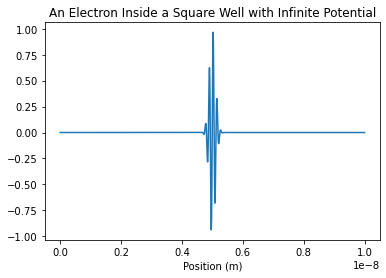

In [6]:
plt.plot(x_pos, psi_0)
plt.title('An Electron Inside a Square Well with Infinite Potential')
plt.xlabel('Position (m)')
plt.show()

We see a sinusoidal wave which seems to be 'isolated' at the center of the well. We call this as a wavepacket. \ 
To better visualize the electron, let us get the probability density of the wavefunction. The probability density is defined as:
$$P(x) = \int_{-\infty}^{\infty}\psi^{\ast}(x)\psi(x) dx$$
Where $\psi^{\ast}$ is the conjugate of the wavefunction.\
Let us get the conjugate of $\tt psi0$ using the $\tt np.conj()$ function.

In [7]:
psi_0_star = np.conj(psi_0)

We then multiply $\tt psi0$ with $\tt psi0star$ to get the probability density $P$ and store it inside $\tt prob0$.

In [8]:
prob_0 = np.multiply(psi_0, psi_0_star)

We then plot the probability density and impose it with the wavefunction.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


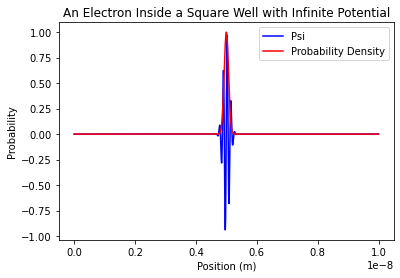

In [9]:
plt.plot(x_pos, psi_0, color='blue', label='Psi')
plt.plot(x_pos, prob_0, color='red', label='Probability Density')
plt.title('An Electron Inside a Square Well with Infinite Potential')
plt.xlabel('Position (m)')
plt.ylabel('Probability')
plt.legend()
plt.show()

Using $P$, as shown in red, we could visualize the electron's likely position which is centered at 0.5e-8, which describes $x=L/2$. \
Now, let us evolve the function through time using the Crank-Nicholson method.

We can write the relationship between an initial wavefunction and its subsequent timestep using:
$$A\psi(t+h)=B\psi(t)$$
or similarly,
$$A\psi_{h+1}=B\psi_{h}$$
indicating the previous wavefunction as $h$ and the next evolved wavefunction as $h+1$. \
We then denote $A$ as: 
$$A=\begin{pmatrix}
a_1 & a_2 \\
a_2 & a_1 & a_2 \\
& a_2 & a_1 & a_2 \\
&& a_2 & a_1 \\
&&&& ...
\end{pmatrix}$$
and $B$ is described as:
$$B=\begin{pmatrix}
b_1 & b_2 \\
b_2 & b_1 & b_2 \\
& b_2 & b_1 & b_2 \\
&& b_2 & b_1 \\
&&&& ...
\end{pmatrix}$$
with
$$a_1 = 1 + h\frac{\imath\hbar}{2ma^2}$$
$$a_2 = -h\frac{\imath\hbar}{4ma^2}$$
$$b_1 = 1 - h\frac{\imath\hbar}{2ma^2}$$
$$b_2 = h\frac{\imath\hbar}{4ma^2}$$

We define $B$ as a 2D array of size (1000,1000). We then define $b_1$ and $b_2$

In [10]:
B = np.zeros((N,N), complex)
print(B)
b1 = 1 - h*(1j*hbar)/(2*m*a**2)
b2 = h*(1j*hbar)/(4*m*a**2)

[[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]


We will do the same with $A$ by defining a (1000,1000) 2D array. We will also define $a_1$ and $a_2$.

In [11]:
A = np.zeros((N,N), complex)
a1 = 1 + h*(1j*hbar)/(2*m*a**2)
a2 = -h*(1j*hbar)/(4*m*a**2)
print(A)

[[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]


We then input the values of $a_1$ and $a_2$ in $A$, and $b_1$ and $b_2$ in $B$.

In [12]:
for i in range(0,N-1):
    B[i][i]=b1
    B[i][i+1]=b2
    B[i+1][i]=b2
    B[i+1][i+1]=b1
    A[i][i]=a1
    A[i][i+1]=a2
    A[i+1][i]=a2
    A[i+1][i+1]=a1
print(A)
print(B)

[[ 1.+5.79097596j -0.-2.89548798j  0.+0.j         ...  0.+0.j
   0.+0.j          0.+0.j        ]
 [-0.-2.89548798j  1.+5.79097596j -0.-2.89548798j ...  0.+0.j
   0.+0.j          0.+0.j        ]
 [ 0.+0.j         -0.-2.89548798j  1.+5.79097596j ...  0.+0.j
   0.+0.j          0.+0.j        ]
 ...
 [ 0.+0.j          0.+0.j          0.+0.j         ...  1.+5.79097596j
  -0.-2.89548798j  0.+0.j        ]
 [ 0.+0.j          0.+0.j          0.+0.j         ... -0.-2.89548798j
   1.+5.79097596j -0.-2.89548798j]
 [ 0.+0.j          0.+0.j          0.+0.j         ...  0.+0.j
  -0.-2.89548798j  1.+5.79097596j]]
[[1.-5.79097596j 0.+2.89548798j 0.+0.j         ... 0.+0.j
  0.+0.j         0.+0.j        ]
 [0.+2.89548798j 1.-5.79097596j 0.+2.89548798j ... 0.+0.j
  0.+0.j         0.+0.j        ]
 [0.+0.j         0.+2.89548798j 1.-5.79097596j ... 0.+0.j
  0.+0.j         0.+0.j        ]
 ...
 [0.+0.j         0.+0.j         0.+0.j         ... 1.-5.79097596j
  0.+2.89548798j 0.+0.j        ]
 [0.+0.j         0.

Our goal now is to reduce $B\psi_{n}$ into a vector $v$. Hence, we will do that using the $\tt matmul()$ function.

In [13]:
v = np.matmul(B, psi_0)

The relation now looks like $A\psi_{h+1}=v$. We can solve for $\psi_{h+1}$ using the $\tt linalg.solve()$ function.

In [14]:
new_psi = np.linalg.solve(A, v)

Let us see if there is any movement in the wavefunction.  We plot the wavefunction and the probability density that corresponds to $\tt newpsi$.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


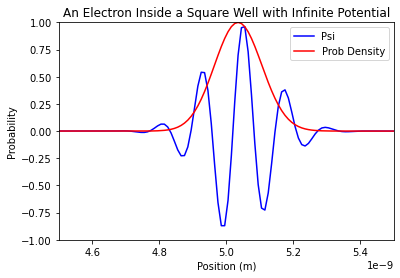

In [15]:
plt.plot(x_pos, new_psi, color='blue', label='Psi')
plt.plot(x_pos, new_psi*np.conj(new_psi), color='red', label='Prob Density')
plt.xlim(45*L/100,55*L/100)
plt.ylim(-1,1)
plt.title('An Electron Inside a Square Well with Infinite Potential')
plt.xlabel('Position (m)')
plt.ylabel('Probability')
plt.legend()
plt.show()

We can see here that the wavefunction and its probability density has moved to the right of $L/2$. This means that we successfully evolved the wavefunction at a timestep of $1h$. \
We then do this evolution until the timestep of $10000h$. We then collect each evolution inside a 1D array.

In [16]:
time_steps = 10000
psi_iter = np.copy(new_psi)
new_psi_iter = []
psi_series = []

for i1 in range(time_steps):
    v = np.matmul(B, psi_iter) # Reduce B*psi into v
    new_psi_iter = np.linalg.solve(A, v) # Solves the matrix system of A*psi = v
    psi_series.append(new_psi_iter) # appends new_psi to 2D array
    psi_iter, new_psi_iter = new_psi_iter , psi_iter # switch values to recursively apply the 
    # new psi into the relation again

In [17]:
# Copy the evolved wavefunction into another array
psi_series_2 = np.copy(psi_series)

To see if we made the correct evolution, let us check the wavefunction at $t = 200h$.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


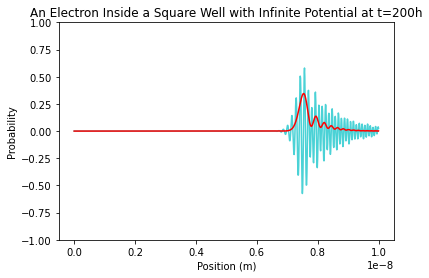

In [18]:
plt.plot(x_pos, psi_series_2[200], color='#4bd2d6', label='Psi')
plt.plot(x_pos, psi_series_2[200]*np.conj(psi_series_2[200]), color='red', label='Prob Density')
plt.ylim(-1.0,1.0)
plt.title('An Electron Inside a Square Well with Infinite Potential at t=200h')
plt.xlabel('Position (m)')
plt.ylabel('Probability')
plt.show()

Let us do the same for $t=1000h$.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


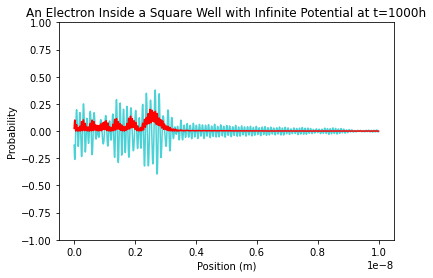

In [19]:
plt.plot(x_pos, psi_series_2[1000], color='#4bd2d6', label='Psi')
plt.plot(x_pos, psi_series_2[1000]*np.conj(psi_series_2[1000]), color='red', label='Prob Density')
plt.ylim(-1.0,1.0)
plt.title('An Electron Inside a Square Well with Infinite Potential at t=1000h')
plt.xlabel('Position (m)')
plt.ylabel('Probability')
plt.show()

Let us do an animation of the time evolution! We use the $\tt FuncAnimation$ module from matplotlib to create an interactive live plot of the wavefunction and its probability density. 

<IPython.core.display.Javascript object>


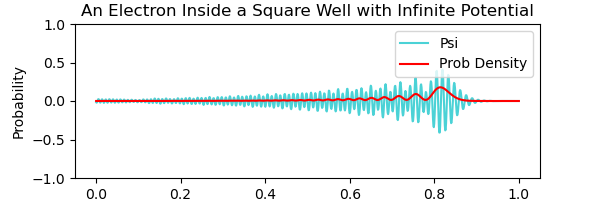

In [26]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(6,2))

# allows to pause the evolution
def onClick(event):
    global pause
    pause ^= True

# defining each frame
def animate(i3):
    ax.clear()
    ax.plot(x_pos, psi_series_2[i3], color='#4bd2d6', label='Psi')
    ax.plot(x_pos, psi_series_2[i3]*np.conj(psi_series_2[i3]), color='red', label='Prob Density')
    ax.legend(loc=1)
    ax.set_title('An Electron Inside a Square Well with Infinite Potential')
    ax.set_xlabel('Position (m)')
    ax.set_ylabel('Probability')
    ax.set_ylim([-1.0,1.0])

ani = FuncAnimation(fig, animate, frames=time_steps, interval=1, repeat=False)
plt.show()

We see from this animation that the wavefunction flattens out as it goes back and forth along the length of the square well. \
In order to explain this behavior, we transform the initial wavefunction into Fourier space $\tilde{\psi}(x,t)$ [1]. This results into:
$$\tilde{\psi}(x,t)=\exp\left[-\frac{1}{2}\left(\frac{x-(x_{0}-v_{g}t)}{\sigma{}(t)}\right)^{2}\right]e^{\imath\phi(x,t)}$$
For now, it is important to note that $v_g$ is the group velocity. Note that the wavefunction is a superimposition of several waves but move at a single velocity. We also note $\sigma(t)$ here as a function of time that determines the spread of the wavepacket. Here, 
$$\sigma(t)=\sigma_{x}\sqrt{1+\left(\frac{\lambda_{c}ct}{2\pi\sigma^{2}_{x}}\right)^{2}}$$
Setting aside the indicated constants, we see here that $t$ is proportional to $\sigma(t)$, thus when we increase time, the spread of the wavefunction increases. The behavior is so-called the wavepacket dispersion.\
Since $\tilde{\psi}$ is exponential, the dispersion of the wavepacket grows rapidly. Moreover, when we increase $\sigma_{x}$, the wavepacket would disperse faster. 
A consequence of this behavior is the **Heisenberg uncertainty principle**, where:
$$\sigma_{x}\sigma_{p}\geq\frac{\hbar}{2}$$
As we confine $x$ to be more measureable by reducing $\sigma_{x}$, the faster and more uncertain the momentum would be.

You can also run the animation at 5x speed.

<IPython.core.display.Javascript object>


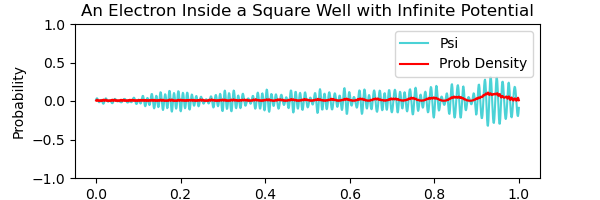

In [27]:
fig2, ax2 = plt.subplots(figsize=(6,2))

def onClick(event):
    global pause
    pause ^= True
    
def animate2(i4):
    ax2.clear()
    ax2.plot(x_pos, psi_series_2[i4*5], color='#4bd2d6', label='Psi')
    ax2.plot(x_pos, psi_series_2[i4*5]*np.conj(psi_series_2[i4*5]), color='red', label='Prob Density')
    ax2.set_title('An Electron Inside a Square Well with Infinite Potential')
    ax2.set_xlabel('Position (m)')
    ax2.set_ylabel('Probability')
    ax2.legend(loc=1)
    ax2.set_ylim([-1.0,1.0])

ani2 = FuncAnimation(fig2, animate2, frames=(time_steps//5)-1, interval=1, repeat=False)
plt.show()

In [22]:
# OPTION 2: Can be saved as a .gif locally
#from matplotlib.animation import PillowWriter
#ani.save('animation_drawing1.gif', writer=PillowWriter(fps=30), dpi=72)

### Reference

Schwartz, M. (2016). Lecture 11: Wavepackets and dispersion. Harvard University.